<a href="https://colab.research.google.com/github/yunatseng/ML100-Days/blob/main/Day_042_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

In [ ]:
# import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### 1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？

In [ ]:
iris = datasets.load_iris()
print(iris.feature_names) # 印出所有的特徵

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### 嘗試調整下列參數
- criterion: 衡量量資料相似程度的 metric
- max_depth: 樹能⽣生長的最深限制
- min_samples_split: ⾄至少要多少樣本以上才進⾏行行切分
- min_samples_leaf: 最終的葉⼦子 (節點) 上⾄至少要有多少樣本

In [ ]:

# 這段程式碼的輸出應該是四個數組：

# x_train：訓練集特徵（佔資料的80%）
# x_test：測試集特徵（佔資料的20%）
# y_train：訓練集目標變數（對應於x_train的花種類標籤）
# y_test：測試集目標變數（對應於x_test的花種類標籤）

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)

# 建立 DecisionTreeClassifier 分類器物件，設定參數
tr_clf = DecisionTreeClassifier(criterion='gini',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                random_state=42)

# 使用 fit 方法對模型進行訓練，將訓練集 x_train 和對應的目標變數 y_train 作為輸入數據
tr_clf.fit(x_train, y_train)

# 訓練完成後，分類器物件 tr_clf 中包含了訓練好的決策樹模型，可以用來對新的數據進行預測


DecisionTreeClassifier(random_state=42)

In [ ]:
# 訓練集的預測結果
y_pred_train = tr_clf.predict(x_train)

# 測試集的預測結果
y_pred = tr_clf.predict(x_test)

# 計算訓練集和測試集的auc得分
train_acc = metrics.accuracy_score(y_pred_train, y_train)
test_acc = metrics.accuracy_score(y_pred, y_test)

# 輸出得分
print("train accuracy: {}".format(train_acc))
print("test accuracy: {}".format(test_acc))

train accuracy: 1.0
test accuracy: 1.0


#### Visulization [tree_plot()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)

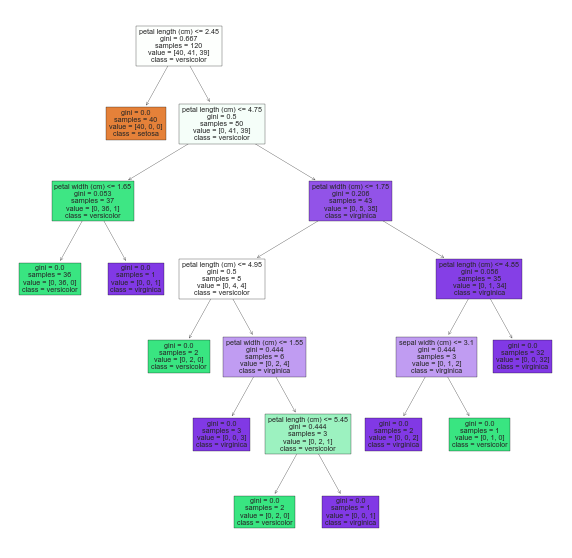

In [ ]:
plt.figure(figsize = (10,10)) #用來設置圖像的大小，這裡設置為10*10英寸
tree.plot_tree(tr_clf, filled = True, 
               feature_names = iris.feature_names,
               class_names = iris.target_names)
# filled = True表示每個節點會以填充的方式呈現，
# feature_names被設置為iris.feature_names，這是一個包含特徵名稱的列表，
# class_names被設置為iris.target_names，這是一個包含目標變數名稱的列表。
plt.show()

透過第三方程式幫忙繪圖 ( https://graphviz.org )

Mac 可透過以下指令安裝:
`brew install graphviz`

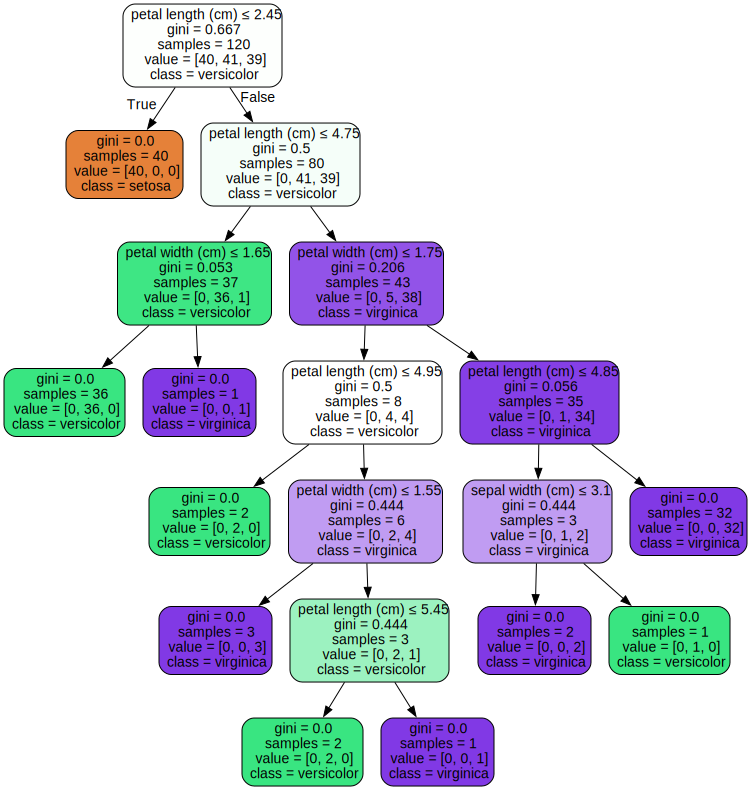

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# 將決策樹導出為Graphviz格式
dot_data = export_graphviz(tr_clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)

# 將Graphviz格式轉換為圖像格式
graph = graphviz.Source(dot_data)

# 顯示圖像
graph

In [ ]:
FI = pd.DataFrame({'Feature':iris.feature_names, 'Importance':tr_clf.feature_importances_})
FI.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
2,petal length (cm),0.906143
3,petal width (cm),0.077186
1,sepal width (cm),0.016670
0,sepal length (cm),0.000000


### 2. 改用其他資料集，並與回歸模型的結果進行比較

In [ ]:
diabetes = datasets.load_diabetes() 
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes.feature_names
# 年齡：以年為單位的年齡
# 性別：1代表男性，0代表女性
# 身體質量指數（BMI）：體重（公斤）/ 身高^2（米）
# 平均血壓：以mm Hg為單位的平均血壓
# 總血清膽固醇
# 低密度脂蛋白膽固醇
# 高密度脂蛋白膽固醇
# 總膽固醇/高密度脂蛋白膽固醇比值
# 血清三酸甘油
# 血糖

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Baseline: 直接使用原本的 10 個特徵代入決策樹模型

In [ ]:
diabetes.data.shape # 先看一下資料集的大小

(442, 10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state = 42)
# criterion：表示決策樹的分裂標準，這裡設置為“squared_error”，表示使用均方誤差（Mean Squared Error，MSE）作為分裂標準。
# max_depth：表示決策樹的最大深度，這裡設置為 None，表示決策樹的深度沒有限制。
# min_samples_split：表示分裂內部節點所需的最小樣本數，這裡設置為10，表示每個節點至少需要包含10個樣本才能進行分裂。
# min_samples_leaf：表示葉子節點所需的最小樣本數，這裡設置為5，表示每個葉子節點至少需要包含5個樣本。
# random_state：表示隨機種子，用於控制模型的隨機性，這裡設置為42。
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth = None, 
                               min_samples_split = 10,
                               min_samples_leaf = 5,
                               random_state = 42)

dt_reg.fit(x_train, y_train)

y_pred = dt_reg.predict(x_test)

In [ ]:
# 平均絕對誤差（Mean Absolute Error，MAE）：表示預測值與實際值之間的絕對誤差的平均值，可以用來評估模型的整體預測精度。MAE的值越小，表示模型的預測能力越好。
# 均方誤差（Mean Squared Error，MSE）：表示預測值與實際值之間的平方誤差的平均值，也是常用的評估指標之一。MSE的值越小，表示模型的預測能力越好。
# R平方（R-squared）：表示預測值與實際值之間的相關性程度，可以用來評估模型的解釋能力。R平方的值越接近1，表示模型的解釋能力越好。

# 計算在訓練集上的 MSE
train_mse = metrics.mean_squared_error(y_train, dt_reg.predict(x_train))

# 計算在測試集上的MSE
test_mse = metrics.mean_squared_error(y_test, y_pred)

# 計算在訓練集上的R平方
train_r2 = metrics.r2_score(y_train, dt_reg.predict(x_train))

# 計算在測試集上的R平方
test_r2 = metrics.r2_score(y_test, y_pred)

print(f'train MSE: {train_mse:.3f}')
print(f'test MSE: {test_mse:.3f}\n')
print(f'train R-squared: {train_r2:.3f}')
print(f'test R-squared: {test_r2:.3f}')

train MSE: 1246.694
test MSE: 3489.188

train R-squared: 0.795
test R-squared: 0.341


In [ ]:
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth = 4, 
                               min_samples_split = 10,
                               min_samples_leaf = 5,
                               random_state = 42)

dt_reg.fit(x_train, y_train)

y_pred = dt_reg.predict(x_test)

# 計算在訓練集上的 MSE
train_mse = metrics.mean_squared_error(y_train, dt_reg.predict(x_train))

# 計算在測試集上的MSE
test_mse = metrics.mean_squared_error(y_test, y_pred)

# 計算在訓練集上的R平方
train_r2 = metrics.r2_score(y_train, dt_reg.predict(x_train))

# 計算在測試集上的R平方
test_r2 = metrics.r2_score(y_test, y_pred)

print(f'train MSE: {train_mse:.3f}')
print(f'test MSE: {test_mse:.3f}\n')
print(f'train R-squared: {train_r2:.3f}')
print(f'test R-squared: {test_r2:.3f}')

train MSE: 2582.767
test MSE: 2977.130

train R-squared: 0.575
test R-squared: 0.438


#### Visulization

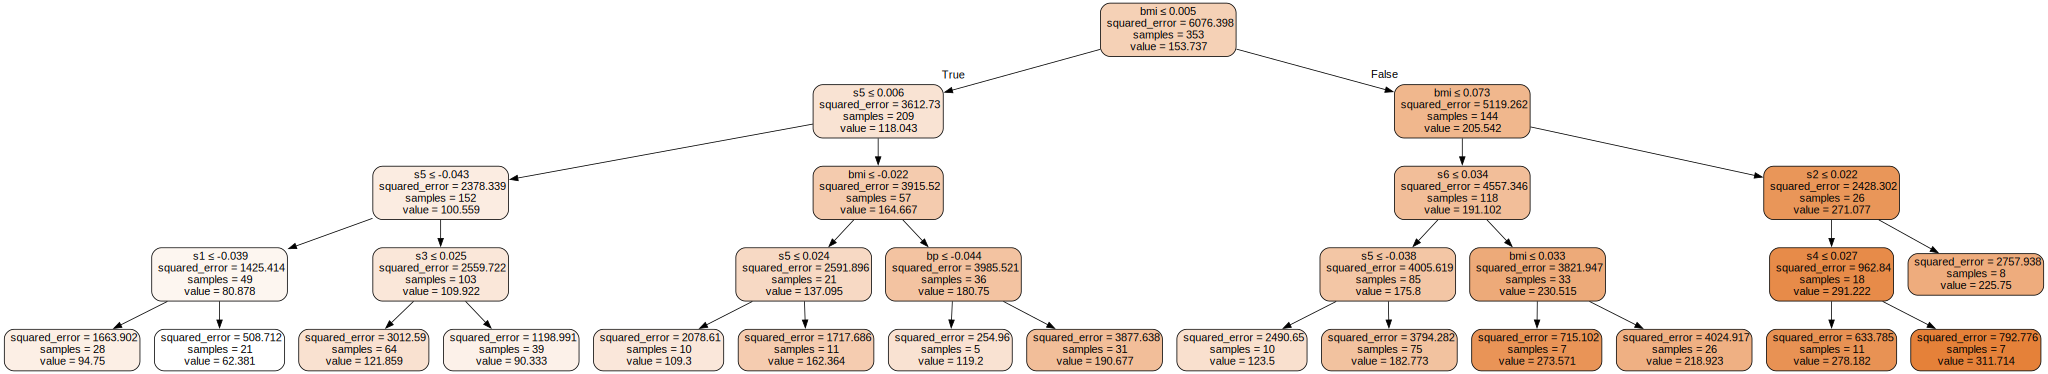

In [ ]:
# 將決策樹導出為 Graphviz 格式
# 這邊注意回歸問題就沒有 target_names 了,因為他是一串連續的數字～
dot_data_2 = export_graphviz(dt_reg, out_file=None, 
                           feature_names=diabetes.feature_names, 
                           filled=True, rounded=True,  
                           special_characters=True)

# 將Graphviz格式轉換為圖像格式
graph = graphviz.Source(dot_data_2)

# 顯示圖像
graph

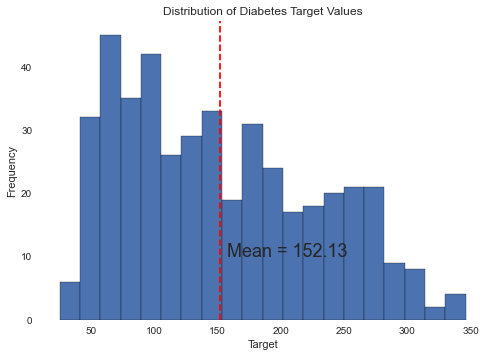

In [ ]:
# 繪製直方圖 看一下 y 的分佈如何
plt.hist(diabetes.target, bins=20, edgecolor='black')

# 添加框線圖
plt.box(False)
plt.axvline(x=diabetes.target.mean(), color='red', linestyle='--')
plt.text(diabetes.target.mean() + 5, 10, 'Mean = {:.2f}'.format(diabetes.target.mean()))

# 添加標籤和標題
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Target Values')

# 顯示圖形
plt.show()

#### Feature Importance

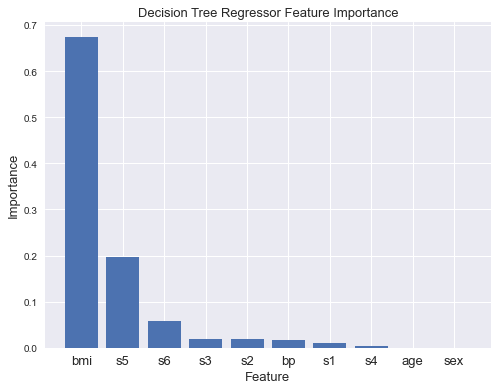

In [ ]:
# 創建一個 DataFrame 來存儲特徵重要性
FI = pd.DataFrame({'Feature': diabetes.feature_names, 'Importance': dt_reg.feature_importances_})

# 按特徵重要性遞減排序
FI = FI.sort_values('Importance', ascending=False)

# 調整圖形大小
plt.figure(figsize=(8, 6))

# 繪製長條圖
plt.bar(FI['Feature'], FI['Importance'])

# 添加標籤和標題
plt.xlabel('Feature',fontsize=13)
plt.ylabel('Importance',fontsize=13)
plt.title('Decision Tree Regressor Feature Importance',fontsize=13)

# 設置 x 軸標籤的字體大小
plt.xticks(fontsize=13)

# 顯示圖形
plt.show()

In [ ]:
FI = pd.DataFrame({'Feature':diabetes.feature_names, 'Importance':dt_reg.feature_importances_})
FI.sort_values(by = 'Importance', ascending = False) 
# BMI NO1, 血清三酸甘油酯 NO2, 血糖 NO3
# 結論：不要吃太胖！！！小心得糖尿病....

,Feature,Importance
2,bmi,0.673627
8,s5,0.197955
9,s6,0.057705
6,s3,0.019530
5,s2,0.019251
3,bp,0.017837
4,s1,0.010195
7,s4,0.003900
0,age,0.000000
1,sex,0.000000


In [ ]:
# 將資料轉換為 DataFrame 格式
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# 添加目標列
df['target'] = diabetes.target

# 查看前五行數據
df.head()

# 在 diabetes 資料集中，所有特徵都已經通過 Z-score 標準化處理。
# 這種標準化方法可以使每個特徵符合標準正態分佈（平均值為 0，標準差為 1），有相似的數值範圍。
# 這樣做的好處是，在訓練機器學習模型時，不同的特徵可以被等量對待，並且不會受到原始數值的範圍或單位的影響。
# 但是，在應用 Z-score 標準化之前，需要確定數據分佈是否近似於標準正態分佈，否則該方法可能會產生不正確的結果。

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
